In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
tdf=pd.read_csv('/content/drive/MyDrive/rain/normalized_dataset.csv')
rdf=pd.read_csv('/content/drive/MyDrive/rain/minmax_scaled_rainfall.csv')

In [ ]:
tdf.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,0.530822,0.527197,0.511364,0.608696,0.595308,0.788793,0.761628,0.390071,0.518072,0.693966,0.510460,0.545161,0.530120,0.508721,0.542125,0.681159,0.572052
1,1902,0.821918,0.671548,0.732955,0.586957,0.665689,0.625000,0.616279,0.659574,0.234940,0.262931,0.305439,0.454839,0.530120,0.732558,0.659341,0.550725,0.314410
2,1903,0.517123,0.489540,0.218750,0.437888,0.510264,0.650862,0.808140,0.269504,0.379518,0.418103,0.129707,0.303226,0.283133,0.473837,0.315018,0.565217,0.235808
3,1904,0.486301,0.407950,0.357955,0.574534,0.422287,0.336207,0.250000,0.340426,0.283133,0.409483,0.192469,0.483871,0.234940,0.406977,0.391941,0.253623,0.336245
4,1905,0.195205,0.000000,0.000000,0.000000,0.586510,0.797414,0.697674,0.617021,0.475904,0.702586,0.644351,0.461290,0.180723,0.000000,0.080586,0.710145,0.585153


In [ ]:
rdf.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JF,MAM,JJAS,OND,ANN
0,1871,0.473552,0.250000,0.237052,0.493333,0.494266,0.790131,0.696484,0.180840,0.558005,0.152624,0.353757,0.113274,0.469880,0.510332,0.587938,0.160826,0.477709
1,1872,0.171285,0.170792,0.093625,0.304762,0.267202,0.672705,0.756564,0.517930,0.580577,0.440608,0.298266,0.332743,0.208262,0.178796,0.743873,0.469962,0.593173
2,1873,0.073048,0.319307,0.247012,0.310476,0.255734,0.196752,0.637294,0.359119,0.463517,0.317680,0.112139,0.153982,0.244406,0.241689,0.368333,0.194618,0.236710
3,1874,0.196474,0.376238,0.161355,0.169524,0.548165,0.914428,0.825990,0.457992,0.676640,0.542127,0.195376,0.065487,0.368330,0.365678,0.890197,0.411765,0.745570
4,1875,0.229219,0.267327,0.209163,0.289524,0.345183,0.693941,0.830441,0.382172,0.699213,0.289365,0.052023,0.120354,0.314974,0.284816,0.782556,0.124531,0.553815


In [ ]:
print ('shape')
print('rdf shape')
print(rdf.shape)
print('tdf shape')
print(tdf.shape)

shape
rdf shape
(146, 18)
tdf shape
(121, 18)


In [ ]:
print('rdf description')
print(rdf.describe())
print('tdf description')
print(tdf.describe())

rdf description
              YEAR         JAN         FEB         MAR         APR  \
count   146.000000  146.000000  146.000000  146.000000  146.000000   
mean   1943.500000    0.250992    0.293198    0.251528    0.351220   
std      42.290661    0.191239    0.219013    0.186488    0.173911   
min    1871.000000    0.000000    0.000000    0.000000    0.000000   
25%    1907.250000    0.103904    0.126856    0.135956    0.240476   
50%    1943.500000    0.210327    0.248762    0.201195    0.318095   
75%    1979.750000    0.364610    0.379950    0.313745    0.453810   
max    2016.000000    1.000000    1.000000    1.000000    1.000000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean     0.369659    0.509416    0.673053    0.502740    0.488398    0.433915   
std      0.183303    0.227352    0.166803    0.193119    0.192739    0.198354   
min      0.000000    0.000000

In [ ]:
print('rdf columns')
print(rdf.columns)
print('tdf columns')
print(tdf.columns)


rdf columns
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JF', 'MAM', 'JJAS', 'OND', 'ANN'],
      dtype='object')
tdf columns
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load datasets
rdf = pd.read_csv('/content/drive/MyDrive/rain/minmax_scaled_rainfall.csv')
tdf = pd.read_csv('/content/drive/MyDrive/rain/normalized_dataset.csv')

# Merge datasets on YEAR
merged_df = pd.merge(rdf[['YEAR', 'ANN']],  # Target: Annual Rainfall
                     tdf.drop(columns=['ANNUAL']),  # Features from temperature
                     on='YEAR',
                     how='inner')

# Feature Engineering: Create time-lagged features (1-year lag)
merged_df = merged_df.sort_values('YEAR')
for col in merged_df.columns:
    if col not in ['YEAR', 'ANN']:
        merged_df[f'{col}_lag1'] = merged_df[col].shift(1)

# Drop rows with NaN (first year with no lag data)
merged_df = merged_df.dropna()

# Split data
X = merged_df.drop(columns=['YEAR', 'ANN'])
y = merged_df['ANN']

# Time-based split (80-20)
split_year = merged_df['YEAR'].quantile(0.8)
train = merged_df[merged_df['YEAR'] <= split_year]
test = merged_df[merged_df['YEAR'] > split_year]

X_train, X_test = train.drop(columns=['YEAR', 'ANN']), test.drop(columns=['YEAR', 'ANN'])
y_train, y_test = train['ANN'], test['ANN']

# Initialize and train model
rf = RandomForestRegressor(n_estimators=200,
                          random_state=42,
                          max_depth=8,
                          min_samples_split=5)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# Feature Importance
importance = pd.DataFrame({'feature': X_train.columns,
                          'importance': rf.feature_importances_})
print("\nTop 10 Features:")
print(importance.sort_values('importance', ascending=False).head(10))

MAE: 0.1340
RMSE: 0.1628
R²: 0.0742

Top 10 Features:
     feature  importance
14   JUN-SEP    0.130256
9        OCT    0.078378
8        SEP    0.062597
6        JUL    0.059850
22  JUL_lag1    0.056297
5        JUN    0.050568
4        MAY    0.048822
23  AUG_lag1    0.038770
10       NOV    0.032873
7        AUG    0.032555


In [ ]:
# Create 2-year lag
for col in merged_df.columns:
    if col not in ['YEAR', 'ANN']:
        merged_df[f'{col}_lag2'] = merged_df[col].shift(2)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train_lstm.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train
history = model.fit(X_train_lstm, y_train,
                   epochs=100,
                   batch_size=16,
                   validation_data=(X_test_lstm, y_test),
                   verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.2751 - val_loss: 0.1428
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1897 - val_loss: 0.0532
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1008 - val_loss: 0.0493
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0531 - val_loss: 0.1536
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0511 - val_loss: 0.1343
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0483 - val_loss: 0.0703
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0367 - val_loss: 0.0473
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0407 - val_loss: 0.0467
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0426 - val_loss: 0.0547
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0388 - val_loss: 0.0672
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0399 - val_loss: 0.0703
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376 - val_loss: 0.0578


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Train Metrics:
MAE: 0.1091
RMSE: 0.1361
R²: 0.4763

Test Metrics:
MAE: 0.1293
RMSE: 0.1631
R²: 0.0702


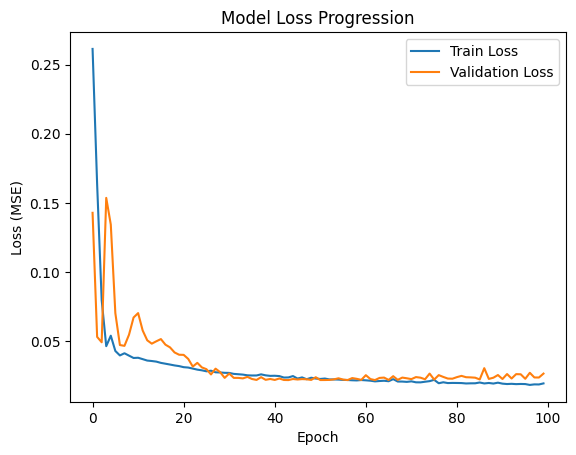

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate predictions
y_train_pred = model.predict(X_train_lstm)
y_test_pred = model.predict(X_test_lstm)

# Calculate metrics
print("Train Metrics:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}\n")

print("Test Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

# Plot loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()

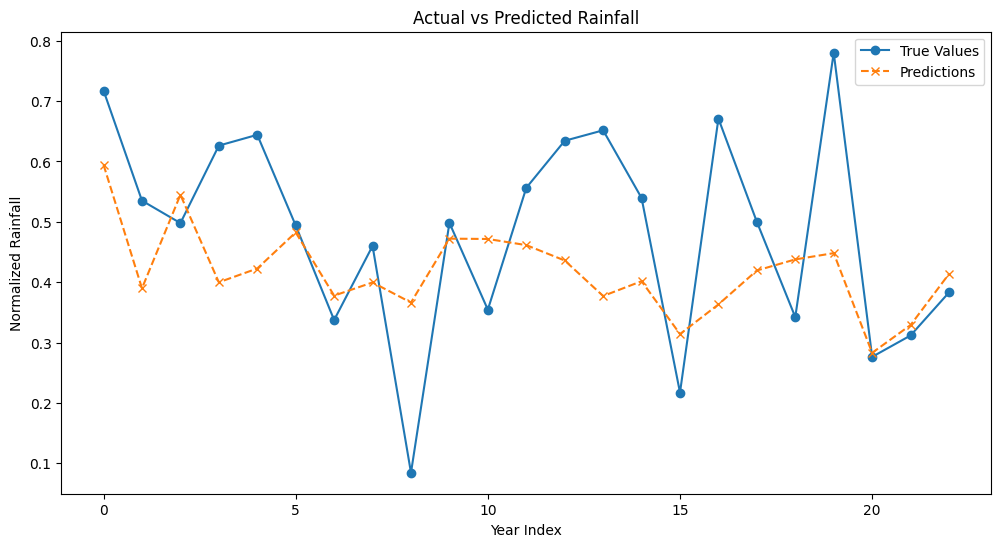

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values', marker='o')
plt.plot(y_test_pred, label='Predictions', linestyle='--', marker='x')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Year Index')
plt.ylabel('Normalized Rainfall')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train_lstm.shape[2], return_sequences=True))
model.add(Dropout(0.3))  # Add dropout for regularization
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-26-33555dfb62e3>, line 2)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Add dropout for regularization
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                  patience=15,
                  restore_best_weights=True)

history = model.fit(X_train_lstm, y_train,
                   epochs=200,  # Increase epochs
                   batch_size=16,
                   validation_data=(X_test_lstm, y_test),
                   callbacks=[es],
                   verbose=1)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.2897 - val_loss: 0.2260
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2712 - val_loss: 0.1726
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1951 - val_loss: 0.0888
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1199 - val_loss: 0.0382
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0591 - val_loss: 0.1516
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0516 - val_loss: 0.0603
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - val_loss: 0.0371
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0384 - val_loss: 0.0426
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0471 - val_loss: 0.0532
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0494 - val_loss: 0.0549
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0325 - val_loss: 0.0377
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0420 - val_l

In [ ]:
# Create 3-year window
window_size = 3
X_window, y_window = [], []
for i in range(len(merged_df) - window_size):
    X_window.append(merged_df.iloc[i:i+window_size].drop(columns=['YEAR','ANN']).values)
    y_window.append(merged_df.iloc[i+window_size]['ANN'])

X_window = np.array(X_window)
y_window = np.array(y_window)

# Then split into train/test

In [ ]:
import tensorflow as tf

# Get input data sample
sample_input = X_train_lstm[:1]

# Compute gradients
with tf.GradientTape() as tape:
    tape.watch(sample_input)
    prediction = model(sample_input)

grads = tape.gradient(prediction, sample_input)[0]
feature_importance = np.mean(np.abs(grads), axis=0)

# Plot importance
plt.barh(range(len(feature_importance)), feature_importance)
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.title('Feature Importance via Gradients')
plt.show()

ValueError: Passed in object [[[0.82191781 0.67154812 0.73295455 0.58695652 0.66568915 0.625
   0.61627907 0.65957447 0.23493976 0.26293103 0.30543933 0.45483871
   0.73255814 0.65934066 0.55072464 0.31441048 0.53082192 0.52719665
   0.51136364 0.60869565 0.59530792 0.7887931  0.76162791 0.39007092
   0.51807229 0.69396552 0.51046025 0.54516129 0.50872093 0.54212454
   0.68115942 0.5720524 ]]] of type 'ndarray', not tf.Tensor or tf.Variable or ExtensionType.

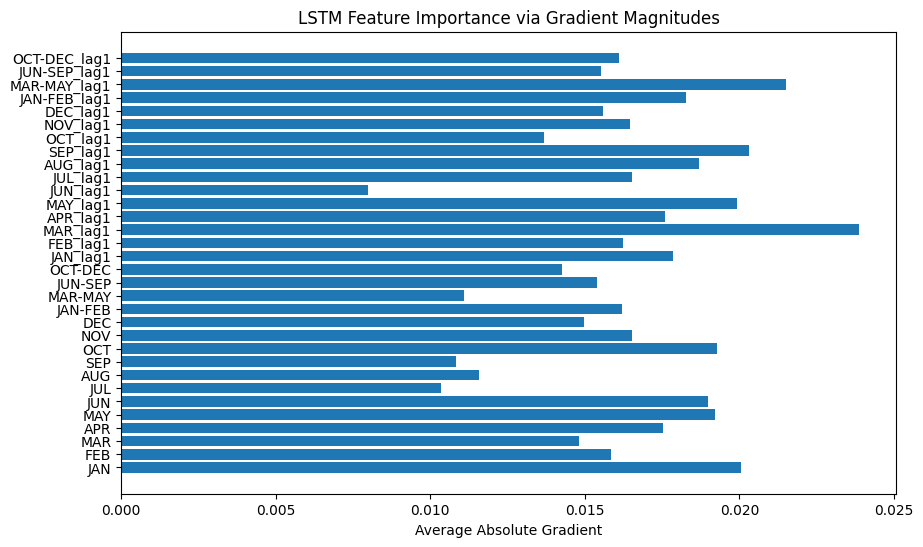

In [ ]:
import tensorflow as tf
import numpy as np

# Get input data sample and convert to tensor
sample_input = tf.convert_to_tensor(X_train_lstm[:1], dtype=tf.float32)

# Compute gradients
with tf.GradientTape() as tape:
    tape.watch(sample_input)
    prediction = model(sample_input)

grads = tape.gradient(prediction, sample_input)
feature_importance = tf.reduce_mean(tf.abs(grads), axis=[0, 1]).numpy()

# Plot importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance)
plt.yticks(range(len(X_train.columns)), X_train.columns)
plt.title('LSTM Feature Importance via Gradient Magnitudes')
plt.xlabel('Average Absolute Gradient')
plt.show()

In [ ]:
print("LSTM Test R²:", r2_score(y_test, y_test_pred))
print("Random Forest Test R²:", r2_score(y_test, rf.predict(X_test)))

LSTM Test R²: 0.07023571210719748
Random Forest Test R²: 0.07415236171091166


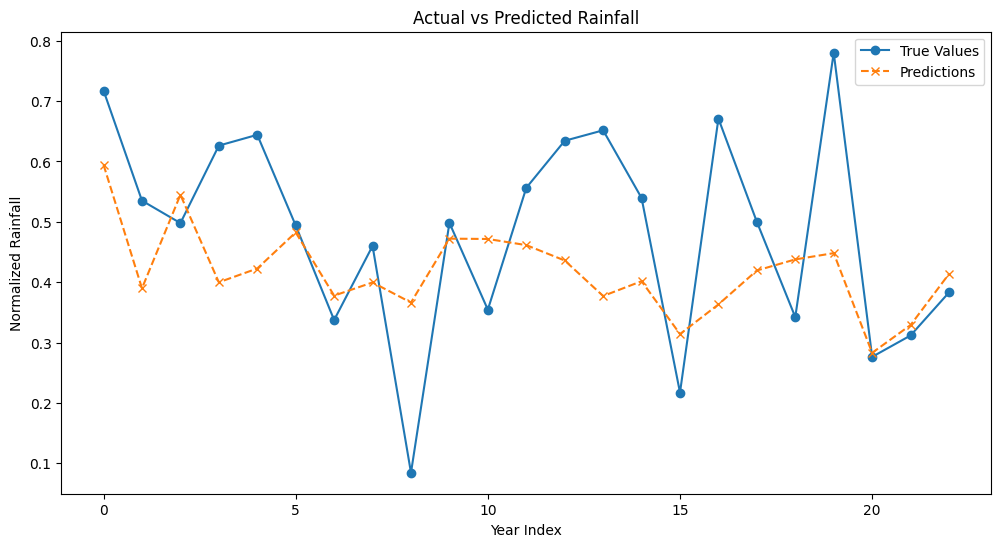

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values', marker='o')
plt.plot(y_test_pred, label='Predictions', linestyle='--', marker='x')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Year Index')
plt.ylabel('Normalized Rainfall')
plt.legend()
plt.show()

In [ ]:
model.save('rainfall_lstm.h5')  # Save entire model

# For later loading:
from tensorflow.keras.models import load_model
loaded_model = load_model('rainfall_lstm.h5')

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [ ]:
# Save (replace your old saving code)
model.save('rainfall_lstm.keras')  # Notice .keras extension

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load with explicit custom objects
loaded_model = load_model('rainfall_lstm.keras',
                         custom_objects={'mse': MeanSquaredError()})

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 15 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Save model (updated format)
model.save('rainfall_lstm.keras')

# Load model with proper configuration
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

loaded_model = load_model(
    'rainfall_lstm.keras',
    custom_objects={
        'MeanSquaredError': MeanSquaredError(),  # Map official name
        'mse': MeanSquaredError()                 # Alias for compatibility
    }
)

In [ ]:
# Save model (updated format)
model.save('rainfall_lstm.keras')

# Load model with proper configuration
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

loaded_model = load_model(
    'rainfall_lstm.keras',
    custom_objects={
        'MeanSquaredError': MeanSquaredError(),  # Map official name
        'mse': MeanSquaredError()                 # Alias for compatibility
    }
)

In [ ]:
import numpy as np

# Get model's expected input shape from architecture
num_features = model.input_shape[-1]  # Should be 32 (based on your columns)
timesteps = 1  # Single year lookback

# Generate random normalized data (matching min-max scaled [0,1] range)
random_input = np.random.rand(1, timesteps, num_features)  # Shape: (1 sample, 1 timestep, N features)

# Make prediction
prediction = model.predict(random_input)

print("Random Input Shape:", random_input.shape)
print("Generated Input:\n", random_input)
print("\nPredicted Normalized Rainfall:", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
Random Input Shape: (1, 1, 32)
Generated Input:
 [[[0.66705935 0.34035206 0.24076941 0.68739518 0.76845475 0.43157196
   0.42095368 0.34181977 0.82011794 0.39726984 0.72552516 0.3520804
   0.03537272 0.08006625 0.63206199 0.34636967 0.47943524 0.67764383
   0.0770351  0.78528568 0.83754677 0.61937022 0.80167234 0.25426988
   0.56436204 0.47689905 0.24325754 0.8471974  0.96416246 0.46885885
   0.46496205 0.54993188]]]

Predicted Normalized Rainfall: 0.48256004


Text(0, 0.5, 'Predicted')

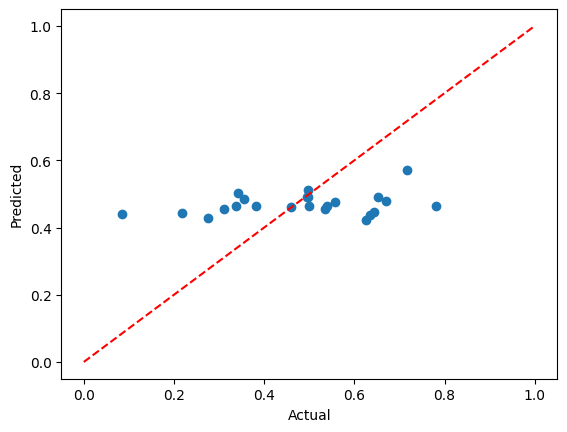

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([0,1],[0,1], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')

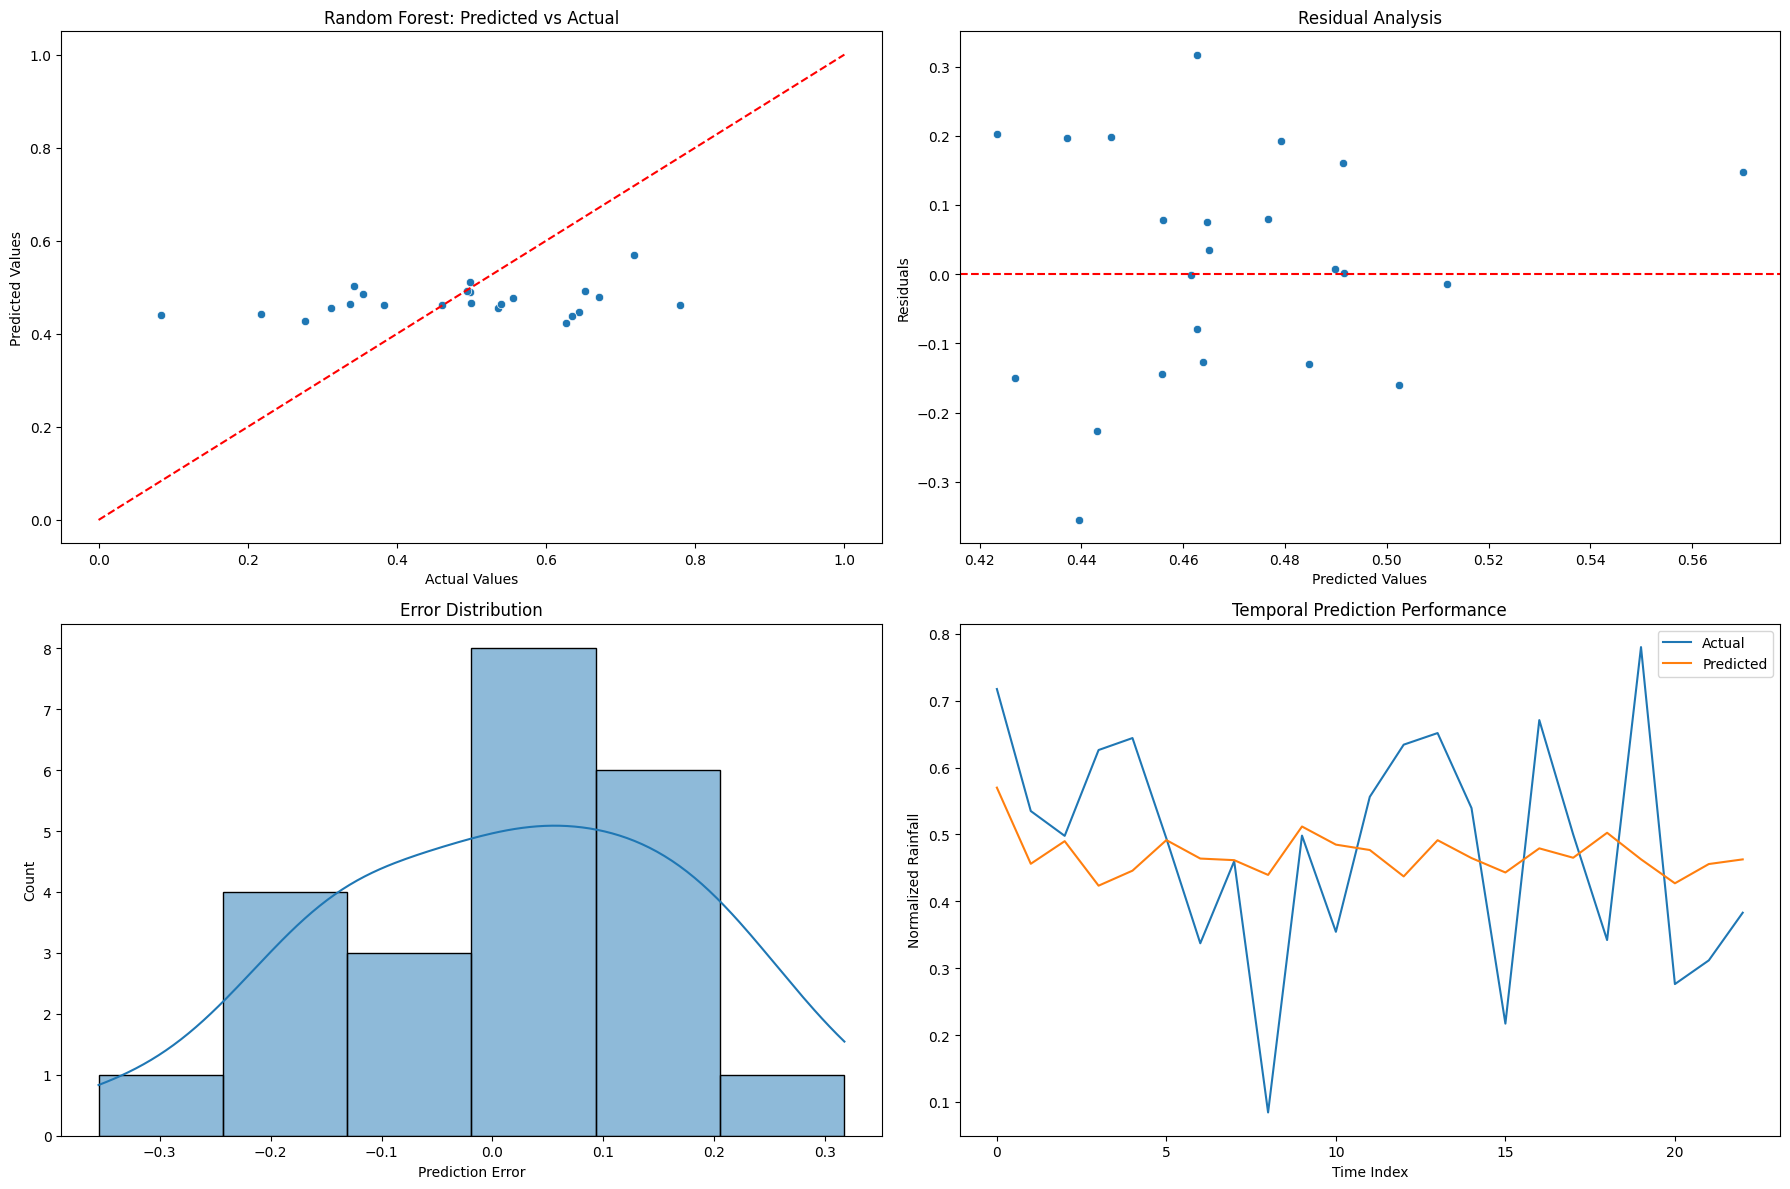

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


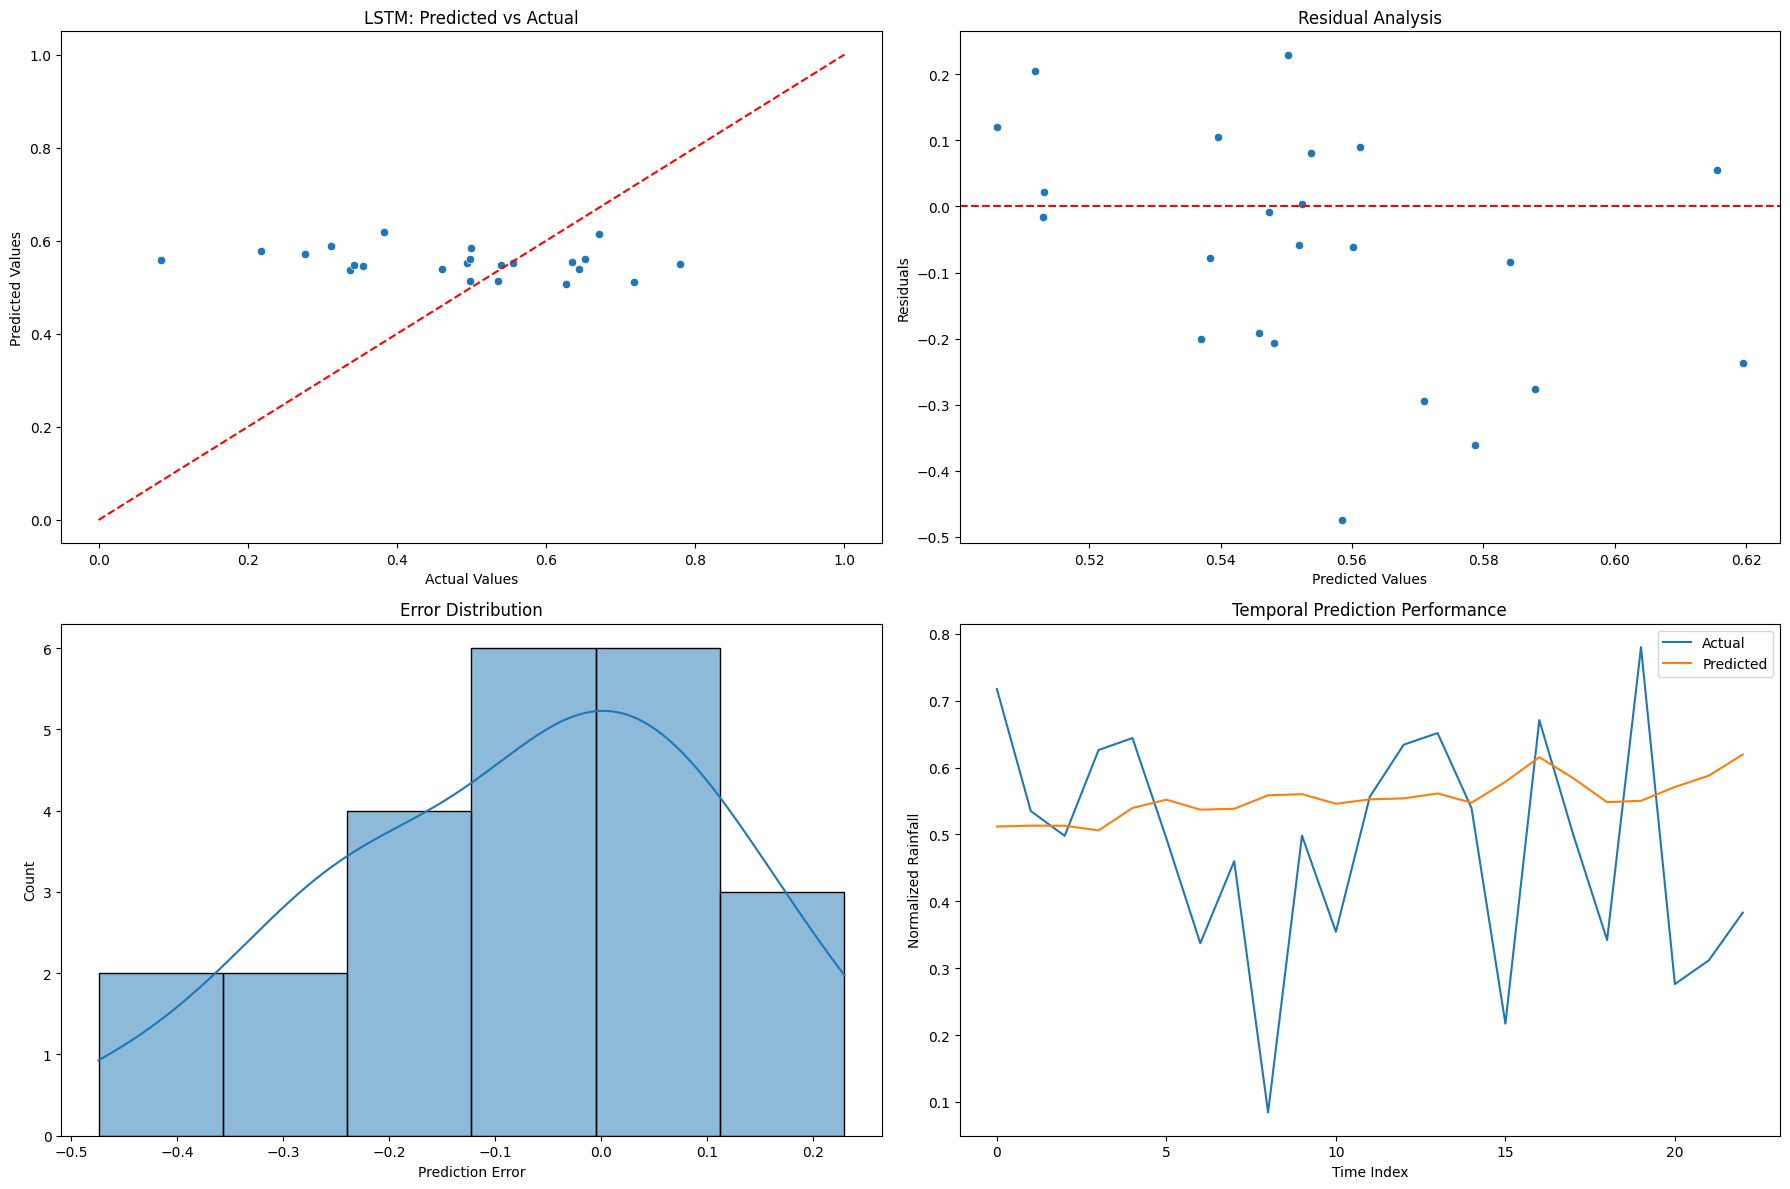

Random Forest Metrics:


,MAE,RMSE,R²,MAPE,NSE,Baseline Comparison
0,0.133965,0.162783,0.074152,44.857839,0.074152,2.2% improvement over mean baseline



LSTM Metrics:


,MAE,RMSE,R²,MAPE,NSE,Baseline Comparison
0,0.150344,0.192582,-0.295855,58.920336,-0.295855,-9.8% improvement over mean baseline



Time Series Cross-Validation:
Fold 1: MAE = 0.1033
Fold 2: MAE = 0.1803
Fold 3: MAE = 0.1409
Fold 4: MAE = 0.1205
Fold 5: MAE = 0.1422


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

def evaluate_rainfall_model(y_true, y_pred, X_test=None, y_train=None, model_name="Model"):
    """
    Comprehensive evaluation for rainfall prediction models
    Returns metrics dictionary and plots
    """
    # Calculate metrics
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred),
        'MAPE': np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-6, None))) * 100,
        'NSE': 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    }

    # Create plots
    plt.figure(figsize=(18, 12))

    # Predicted vs Actual
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    # Residuals plot
    plt.subplot(2, 2, 2)
    residuals = y_true - y_pred
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Analysis')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Error distribution
    plt.subplot(2, 2, 3)
    sns.histplot(residuals, kde=True)
    plt.title('Error Distribution')
    plt.xlabel('Prediction Error')

    # Time series plot
    plt.subplot(2, 2, 4)
    plt.plot(y_true.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Temporal Prediction Performance')
    plt.xlabel('Time Index')
    plt.ylabel('Normalized Rainfall')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Baseline comparisons
    if y_train is not None:
        baseline_mae = mean_absolute_error(y_true, np.full_like(y_true, y_train.mean()))
        metrics['Baseline Comparison'] = f"{(baseline_mae - metrics['MAE'])/baseline_mae * 100:.1f}% improvement over mean baseline"

    if X_test is not None and 'ANN_lag1' in X_test.columns:
        persistence_mae = mean_absolute_error(y_true, X_test['ANN_lag1'])
        metrics['Persistence Comparison'] = f"{(persistence_mae - metrics['MAE'])/persistence_mae * 100:.1f}% improvement over persistence model"

    return metrics

# Example usage
# For Random Forest:
rf_metrics = evaluate_rainfall_model(y_test, rf.predict(X_test),
                      X_test=X_test,
                      y_train=y_train,
                      model_name="Random Forest")

# For LSTM:
lstm_pred = model.predict(X_test_lstm).flatten()
lstm_metrics = evaluate_rainfall_model(y_test, lstm_pred,
                        X_test=X_test,
                        y_train=y_train,
                        model_name="LSTM")

# Print metrics
print("Random Forest Metrics:")
display(pd.DataFrame([rf_metrics]))

print("\nLSTM Metrics:")
display(pd.DataFrame([lstm_metrics]))

# Additional temporal validation
print("\nTime Series Cross-Validation:")
tscv = TimeSeriesSplit(n_splits=5)
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    rf.fit(X.iloc[train_index], y.iloc[train_index])
    fold_pred = rf.predict(X.iloc[test_index])
    fold_mae = mean_absolute_error(y.iloc[test_index], fold_pred)
    print(f"Fold {fold+1}: MAE = {fold_mae:.4f}")

In [ ]:
print(merged_df.head())
print(merged_df.describe())
print(merged_df.columns)


   YEAR       ANN       JAN       FEB       MAR       APR       MAY       JUN  \
1  1902  0.376609  0.821918  0.671548  0.732955  0.586957  0.665689  0.625000   
2  1903  0.615184  0.517123  0.489540  0.218750  0.437888  0.510264  0.650862   
3  1904  0.304980  0.486301  0.407950  0.357955  0.574534  0.422287  0.336207   
4  1905  0.203880  0.195205  0.000000  0.000000  0.000000  0.586510  0.797414   
5  1906  0.553255  0.438356  0.435146  0.125000  0.552795  0.826979  0.426724   

        JUL       AUG  ...  JUL_lag1_lag2  AUG_lag1_lag2  SEP_lag1_lag2  \
1  0.616279  0.659574  ...            NaN            NaN            NaN   
2  0.808140  0.269504  ...            NaN            NaN            NaN   
3  0.250000  0.340426  ...       0.761628       0.390071       0.518072   
4  0.697674  0.617021  ...       0.616279       0.659574       0.234940   
5  0.593023  0.290780  ...       0.808140       0.269504       0.379518   

   OCT_lag1_lag2  NOV_lag1_lag2  DEC_lag1_lag2  JAN-FEB_lag1_l